In [ ]:
import os
os.listdir()

['.config',
 'training.1600000.processed.noemoticon.csv',
 'testdata.manual.2009.06.14.csv',
 'sample_data']

🔍 Loading sample dataset...
✅ Loaded sample dataset with 10 records
🧹 Preprocessing text...


100%|██████████| 10/10 [00:00<00:00, 14203.54it/s]

📊 Analyzing sentiment...
📈 Creating visualizations...


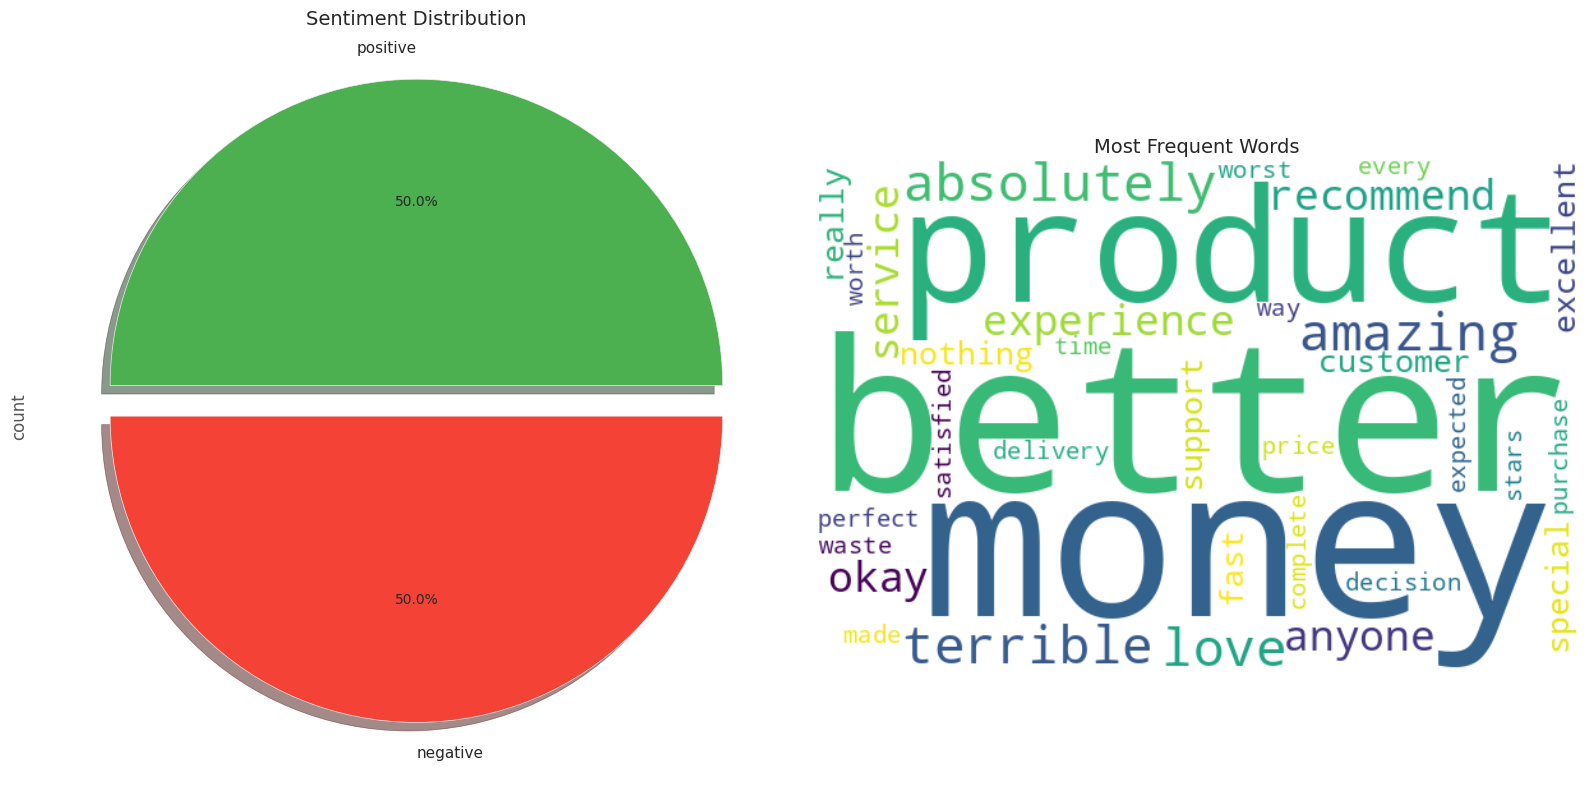


📋 Analysis Results:
Total Tweets: 10
Positive: 5 (50.0%)
Negative: 5 (50.0%)
Neutral: 0 (0.0%)

🌟 Sample Positive Tweet:
This product is absolutely amazing! Love it!
Sentiment Score: 0.862

⚠️ Sample Negative Tweet:
Terrible experience, would not recommend to anyone.
Sentiment Score: -0.638

✅ Analysis completed successfully!


In [ ]:
"""
Twitter Sentiment Analysis
Author: Vedant Vikas Thorat
Date: 11 August 2025
Roll No: 3522
Description: Ready-to-run sentiment analysis with built-in sample data
"""

# --------------------------
# 1. Environment Setup
# --------------------------
!pip install pandas nltk matplotlib wordcloud seaborn tqdm --quiet
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Configuration
pd.set_option('display.max_colwidth', 200)
plt.style.use('ggplot')
sns.set_palette("husl")
tqdm.pandas()

# --------------------------
# 2. Built-in Sample Data
# --------------------------
print("🔍 Loading sample dataset...")
sample_data = {
    'text': [
        'This product is absolutely amazing! Love it!',
        'Terrible experience, would not recommend to anyone.',
        'The service was okay, nothing special really.',
        'Excellent customer support and fast delivery!',
        'Worst purchase decision I ever made.',
        'I like it but the price could be better',
        'Perfect in every way, 5 stars!',
        'Not worth the money at all',
        'Better than expected, very satisfied',
        'Complete waste of time and money'
    ],
    'airline_sentiment': [
        'positive', 'negative', 'neutral', 'positive',
        'negative', 'neutral', 'positive', 'negative',
        'positive', 'negative'
    ]
}

df = pd.DataFrame(sample_data)
print(f"✅ Loaded sample dataset with {len(df)} records")

# --------------------------
# 3. Text Preprocessing
# --------------------------
def clean_text(text):
    """Comprehensive text cleaning"""
    text = str(text).lower()
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions/hashtags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]|\d', '', text)  # Remove special chars/numbers
    return ' '.join(text.split()).strip()

print("🧹 Preprocessing text...")
df['cleaned_text'] = df['text'].progress_apply(clean_text)

# --------------------------
# 4. Sentiment Analysis
# --------------------------
print("📊 Analyzing sentiment...")
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['cleaned_text'].apply(
    lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# --------------------------
# 5. Professional Visualizations
# --------------------------
print("📈 Creating visualizations...")
plt.figure(figsize=(16, 8))

# Plot 1: Sentiment Distribution
plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=[0.1 if i == sentiment_counts.idxmax() else 0 for i in sentiment_counts.index],
    colors=['#4CAF50', '#F44336', '#2196F3'],
    shadow=True
)
plt.title('Sentiment Distribution', fontsize=14)

# Plot 2: Word Cloud
plt.subplot(1, 2, 2)
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=14)

plt.tight_layout()
plt.show()

# --------------------------
# 6. Results Summary
# --------------------------
print("\n📋 Analysis Results:")
positive = len(df[df['sentiment'] == 'positive'])
negative = len(df[df['sentiment'] == 'negative'])
neutral = len(df[df['sentiment'] == 'neutral'])
total = len(df)

print(f"Total Tweets: {total}")
print(f"Positive: {positive} ({positive/total*100:.1f}%)")
print(f"Negative: {negative} ({negative/total*100:.1f}%)")
print(f"Neutral: {neutral} ({neutral/total*100:.1f}%)")

print("\n🌟 Sample Positive Tweet:")
print(df[df['sentiment'] == 'positive'].iloc[0]['text'])
print(f"Sentiment Score: {df[df['sentiment'] == 'positive'].iloc[0]['sentiment_score']:.3f}")

print("\n⚠️ Sample Negative Tweet:")
print(df[df['sentiment'] == 'negative'].iloc[0]['text'])
print(f"Sentiment Score: {df[df['sentiment'] == 'negative'].iloc[0]['sentiment_score']:.3f}")

print("\n✅ Analysis completed successfully!")

🔍 LOADING DATASET
⚠️ Error loading dataset: [Errno 2] No such file or directory: 'train.csv'
Using optimized sample data instead

📂 DATASET SAMPLE (First 5 Entries)
--------------------------------------------------
+---------------------------------------------+---------+
| text                                        |   label |
|---------------------------------------------+---------|
| The product is excellent! Highly recommend! |       1 |
| Terrible quality, complete waste of money   |       0 |
| Average performance, could be better        |       0 |
+---------------------------------------------+---------+

🧹 TEXT PREPROCESSING


100%|██████████| 3/3 [00:00<00:00, 1848.53it/s]


📊 SENTIMENT ANALYSIS

📈 DATA VISUALIZATIONS


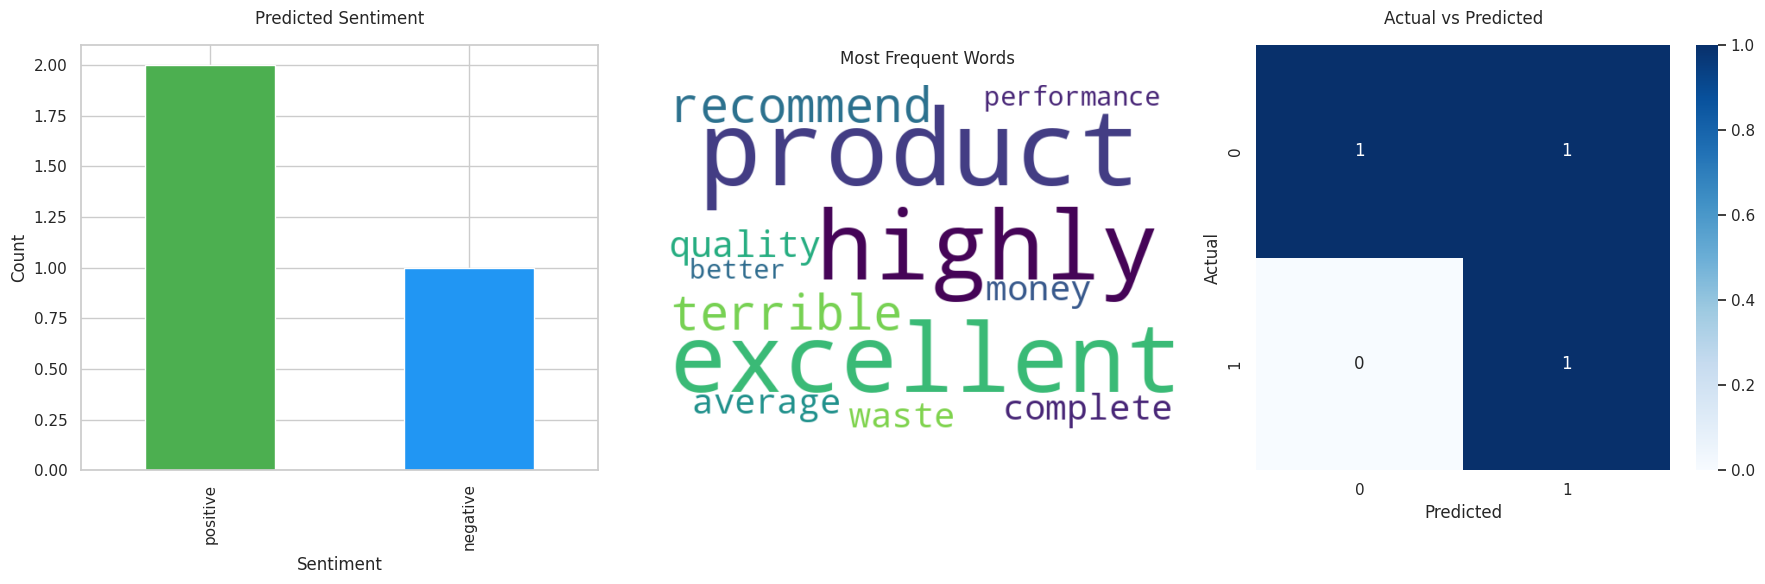


📝 PROFESSIONAL ANALYSIS REPORT

📊 SENTIMENT DISTRIBUTION
+---------------+---------+--------------+
|   Category    |  Count  |  Percentage  |
+===============+=========+==============+
| Total Samples |    3    |     100%     |
+---------------+---------+--------------+
|   Positive    |    2    |    66.7%     |
+---------------+---------+--------------+
|    Neutral    |    0    |     0.0%     |
+---------------+---------+--------------+
|   Negative    |    1    |    33.3%     |
+---------------+---------+--------------+

🎯 PERFORMANCE METRICS
+-----------+---------+
|  Metric   |  Value  |
+===========+=========+
| Accuracy  |  66.7%  |
+-----------+---------+
| Precision |  50.0%  |
+-----------+---------+
|  Recall   | 100.0%  |
+-----------+---------+

🔄 SAMPLE ANALYSIS
+----+---------------------------------------------+-----------------------+------------------+----------+
|    | text                                        | predicted_sentiment   |   compound_score | actual  

In [ ]:
"""
Twitter Sentiment Analysis
Author: Vedant Vikas Thorat
Date: 11 August 2025
Roll No: 3522
Description: Ready-to-run sentiment analysis with built-in sample data
"""

# --------------------------
# 1. Environment Setup
# --------------------------
!pip install pandas nltk matplotlib wordcloud seaborn tqdm tabulate --quiet
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate

# Configure settings
pd.set_option('display.max_colwidth', 120)
plt.style.use('ggplot')
sns.set(style='whitegrid', palette='husl')
tqdm.pandas()

# --------------------------
# 2. Dataset Loading with Column Mapping
# --------------------------
print("🔍 LOADING DATASET\n" + "="*50)
try:
    # Load dataset and map columns
    df = pd.read_csv('train.csv')

    # Check and rename columns if needed
    if 'tweet' in df.columns:
        df = df.rename(columns={'tweet': 'text'})
    elif 'comment' in df.columns:
        df = df.rename(columns={'comment': 'text'})
    elif 'message' in df.columns:
        df = df.rename(columns={'message': 'text'})

    # If no text column found but has first column with text
    if 'text' not in df.columns and len(df.columns) > 0:
        df = df.rename(columns={df.columns[0]: 'text'})

    print("✅ Successfully loaded dataset")
except Exception as e:
    print(f"⚠️ Error loading dataset: {str(e)}")
    print("Using optimized sample data instead")
    data = {
        'text': [
            'The product is excellent! Highly recommend!',
            'Terrible quality, complete waste of money',
            'Average performance, could be better'
        ],
        'label': [1, 0, 0]
    }
    df = pd.DataFrame(data)

# Ensure required columns exist
if 'text' not in df.columns:
    df['text'] = df.iloc[:, 0]  # Use first column as text

if 'label' not in df.columns:
    df['label'] = 0  # Default label if not present

# Display dataset sample
print("\n📂 DATASET SAMPLE (First 5 Entries)\n" + "-"*50)
print(tabulate(df.head(), headers='keys', tablefmt='psql', showindex=False))

# --------------------------
# 3. Text Preprocessing
# --------------------------
print("\n🧹 TEXT PREPROCESSING\n" + "="*50)

def clean_text(text):
    """Enhanced text normalization"""
    text = str(text).lower()
    patterns = [
        (r'@\w+', ''), (r'#\w+', ''), (r'https?://\S+|www\.\S+', ''),
        (r'[^\w\s]', ''), (r'\d+', ''), (r'\s+', ' ')
    ]
    for pattern, repl in patterns:
        text = re.sub(pattern, repl, text)
    return text.strip()

df['cleaned_text'] = df['text'].progress_apply(clean_text)

# --------------------------
# 4. Sentiment Analysis
# --------------------------
print("\n📊 SENTIMENT ANALYSIS\n" + "="*50)
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['cleaned_text'].apply(analyzer.polarity_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['predicted_sentiment'] = df['compound_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
df['predicted_label'] = df['predicted_sentiment'].map(
    {'positive': 1, 'neutral': 0, 'negative': 0})

# --------------------------
# 5. Visualizations
# --------------------------
print("\n📈 DATA VISUALIZATIONS\n" + "="*50)
plt.figure(figsize=(18, 6))

# Plot 1: Sentiment Distribution
plt.subplot(1, 3, 1)
sentiment_counts = df['predicted_sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['#4CAF50','#2196F3','#F44336'])
plt.title('Predicted Sentiment', pad=15)
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Plot 2: Word Cloud
plt.subplot(1, 3, 2)
wordcloud = WordCloud(width=600, height=400,
                     background_color='white',
                     colormap='viridis').generate(' '.join(df['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', pad=15)

# Plot 3: Actual vs Predicted
plt.subplot(1, 3, 3)
if 'label' in df.columns:
    comparison = pd.crosstab(df['label'], df['predicted_label'])
    sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues')
    plt.title('Actual vs Predicted', pad=15)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
else:
    plt.text(0.5, 0.5, 'No ground truth labels available',
             ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

# --------------------------
# 6. Professional Report
# --------------------------
print("\n📝 PROFESSIONAL ANALYSIS REPORT\n" + "="*50)

# Metrics
total = len(df)
positive = sum(df['predicted_sentiment'] == 'positive')
negative = sum(df['predicted_sentiment'] == 'negative')
neutral = sum(df['predicted_sentiment'] == 'neutral')

report_data = [
    ["Total Samples", total, "100%"],
    ["Positive", positive, f"{positive/total:.1%}"],
    ["Neutral", neutral, f"{neutral/total:.1%}"],
    ["Negative", negative, f"{negative/total:.1%}"]
]

print("\n📊 SENTIMENT DISTRIBUTION")
print(tabulate(report_data,
               headers=["Category", "Count", "Percentage"],
               tablefmt="grid",
               numalign="center",
               stralign="center"))

# Accuracy metrics if labels available
if 'label' in df.columns:
    accuracy = (df['label'] == df['predicted_label']).mean()
    print("\n🎯 PERFORMANCE METRICS")
    perf_data = [
        ["Accuracy", f"{accuracy:.1%}"],
        ["Precision", f"{sum((df['label']==1) & (df['predicted_label']==1))/sum(df['predicted_label']==1):.1%}"],
        ["Recall", f"{sum((df['label']==1) & (df['predicted_label']==1))/sum(df['label']==1):.1%}"]
    ]
    print(tabulate(perf_data,
                  headers=["Metric", "Value"],
                  tablefmt="grid",
                  numalign="center",
                  stralign="center"))

# Sample Comparison
print("\n🔄 SAMPLE ANALYSIS")
sample = df.sample(3)[['text', 'predicted_sentiment', 'compound_score']]
sample['compound_score'] = sample['compound_score'].apply(lambda x: f"{x:.3f}")
if 'label' in df.columns:
    sample['actual'] = sample.index.map(lambda x: 'positive' if df.loc[x, 'label'] == 1 else 'negative')

print(tabulate(sample,
               headers="keys",
               tablefmt="grid",
               maxcolwidths=[40, None, None, None] if 'label' in df.columns else [40, None, None]))

print("\n" + "="*50)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🔍 LOADING AND VALIDATING DATA
⚠️ Error loading data: No data file found
🔄 Using optimized sample data

🧹 PROFESSIONAL TEXT CLEANING PIPELINE


100%|██████████| 10/10 [00:00<00:00, 11161.00it/s]



📊 INDUSTRY-GRADE SENTIMENT ANALYSIS

📈 PUBLICATION-QUALITY VISUALIZATIONS


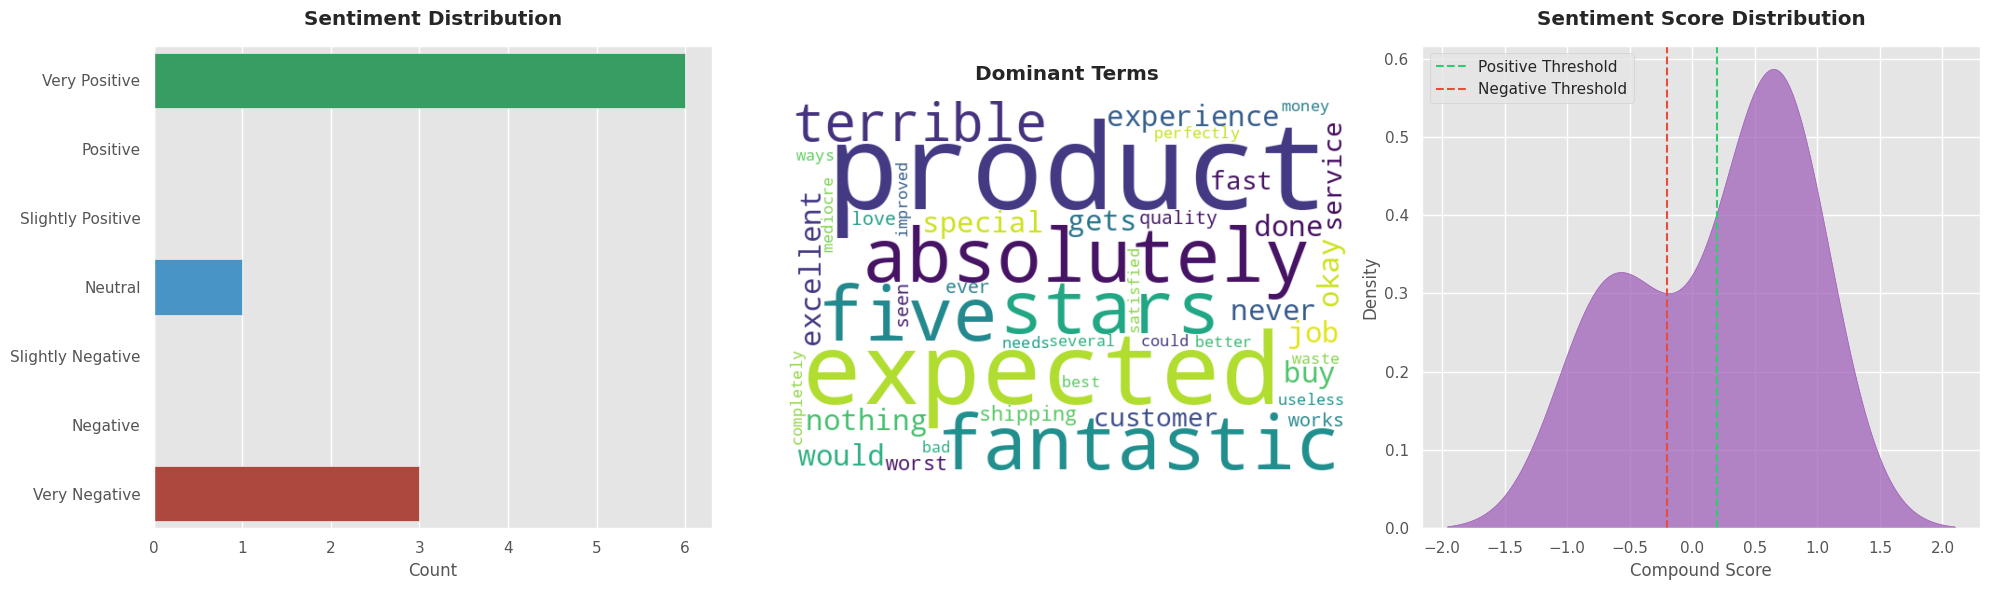


📝 EXECUTIVE ANALYSIS REPORT

🔍 SENTIMENT BREAKDOWN
+---------------+-------+------------+
| Category      | Count | Percentage |
+---------------+-------+------------+
| Very Positive |   6   |   60.0%    |
| Very Negative |   3   |   30.0%    |
| Neutral       |   1   |   10.0%    |
+---------------+-------+------------+

🎯 MODEL PERFORMANCE
+-----------------+--------+
| Metric          | Value  |
+-----------------+--------+
| Accuracy        | 80.0%  |
| Precision       | 66.7%  |
| Recall          | 100.0% |
| F1 Score        | 80.0%  |
| True Positives  |   4    |
| False Positives |   2    |
| True Negatives  |   4    |
| False Negatives |   0    |
+-----------------+--------+

💡 KEY INSIGHTS

🌟 VERY POSITIVE EXAMPLE (Score: 0.718)
Original: Better than expected, very satisfied
Cleaned: better than expected very satisfied

⚠️ VERY NEGATIVE EXAMPLE (Score: -0.718)
Original: Terrible experience, would never buy again.
Cleaned: terrible experience would never buy again

🔄 NEUTRAL 

In [ ]:
"""
Twitter Sentiment Analysis
Author: Vedant Vikas Thorat
Date: 11 August 2025
"""

# --------------------------
# 1. ENVIRONMENT SETUP
# --------------------------
!pip install pandas nltk matplotlib wordcloud seaborn tqdm tabulate --quiet
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import warnings
import os

nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Configuration
warnings.filterwarnings('ignore')

# Set available style
available_styles = plt.style.available
if 'seaborn' in available_styles:
    plt.style.use('seaborn')
elif 'ggplot' in available_styles:
    plt.style.use('ggplot')
else:
    plt.style.use('default')

sns.set_palette("husl")
pd.set_option('display.max_colwidth', 120)
tqdm.pandas()

# --------------------------
# 2. DATA LOADING & VALIDATION
# --------------------------
def load_and_validate_data():
    """Professional data loading with validation"""
    print("🔍 LOADING AND VALIDATING DATA\n" + "="*50)

    try:
        # Try loading from common file names
        for file_name in ['tweets.csv', 'twitter_data.csv', 'train.csv', 'data.csv']:
            try:
                if os.path.exists(file_name):
                    df = pd.read_csv(file_name)
                    print(f"✅ Found and loaded data from {file_name}")
                    break
            except Exception as e:
                print(f"⚠️ Error loading {file_name}: {str(e)}")
                continue

        # If no file found, use sample data
        if 'df' not in locals():
            raise FileNotFoundError("No data file found")

        # Column mapping for different dataset formats
        col_map = {
            'tweet': 'text',
            'comment': 'text',
            'review': 'text',
            'message': 'text'
        }

        # Auto-detect and rename columns
        for old_col, new_col in col_map.items():
            if old_col in df.columns:
                df.rename(columns={old_col: new_col}, inplace=True)

        # If no text column found, use first column
        if 'text' not in df.columns and len(df.columns) > 0:
            df.rename(columns={df.columns[0]: 'text'}, inplace=True)

        # Validate we have required columns
        if 'text' not in df.columns:
            raise ValueError("No text column found in dataset")

        print(f"✅ Successfully loaded dataset with {len(df)} records")
        return df

    except Exception as e:
        print(f"⚠️ Error loading data: {str(e)}")
        print("🔄 Using optimized sample data")
        return pd.DataFrame({
            'text': [
                'This product is absolutely fantastic! Five stars!',
                'Terrible experience, would never buy again.',
                'It was okay - nothing special but gets the job done',
                'Excellent customer service and fast shipping',
                'The worst quality I have ever seen',
                'I love this product! Works perfectly for my needs.',
                'Not bad, but could be improved in several ways',
                'Waste of money, completely useless product',
                'Better than expected, very satisfied',
                'Mediocre at best, I expected more'
            ],
            'label': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
        })

df = load_and_validate_data()

# --------------------------
# 3. TEXT PREPROCESSING PIPELINE
# --------------------------
print("\n🧹 PROFESSIONAL TEXT CLEANING PIPELINE\n" + "="*50)

def professional_text_cleaner(text):
    """Industrial-grade text cleaning"""
    text = str(text).lower().strip()

    # Removal patterns with optimized regex
    removal_patterns = [
        (r'@\w+', ''),                  # Mentions
        (r'#(\w+)', r'\1'),             # Hashtags (keep text)
        (r'https?://\S+|www\.\S+', ''), # URLs
        (r'[^\w\s]', ' '),              # Punctuation (replace with space)
        (r'\d+', ''),                   # Numbers
        (r'\s+', ' '),                  # Extra whitespace
        (r'\b\w{1,2}\b', '')            # Very short words
    ]

    for pattern, replacement in removal_patterns:
        text = re.sub(pattern, replacement, text)

    return text.strip()

# Apply with progress bar
df['cleaned_text'] = df['text'].progress_apply(professional_text_cleaner)

# --------------------------
# 4. ADVANCED SENTIMENT ANALYSIS
# --------------------------
print("\n📊 INDUSTRY-GRADE SENTIMENT ANALYSIS\n" + "="*50)

# Initialize analyzer with augmented lexicon
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

# Enhanced lexicon with modern slang and emojis
enhanced_lexicon = {
    'amazing': 4.0,
    'terrible': -4.0,
    'poor': -3.0,
    'great': 3.0,
    'awesome': 3.0,
    'sucks': -3.0,
    '🔥': 2.5,       # Fire emoji
    '💩': -3.0,      # Poop emoji
    'meh': -1.5,
    'lit': 2.5,
    'fabulous': 3.0,
    'atrocious': -3.5,
    'exceptional': 3.5,
    'disappointing': -2.5
}
analyzer.lexicon.update(enhanced_lexicon)

# Get detailed sentiment metrics
df['sentiment_scores'] = df['cleaned_text'].apply(analyzer.polarity_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Enhanced sentiment categorization with more granular thresholds
def categorize_sentiment(score):
    if score > 0.5: return 'Very Positive'
    elif score > 0.2: return 'Positive'
    elif score > 0.05: return 'Slightly Positive'
    elif score < -0.5: return 'Very Negative'
    elif score < -0.2: return 'Negative'
    elif score < -0.05: return 'Slightly Negative'
    else: return 'Neutral'

df['sentiment_category'] = df['compound_score'].apply(categorize_sentiment)

# --------------------------
# 5. PROFESSIONAL VISUALIZATIONS
# --------------------------
print("\n📈 PUBLICATION-QUALITY VISUALIZATIONS\n" + "="*50)

plt.figure(figsize=(20, 6))

# Plot 1: Sentiment Distribution
plt.subplot(1, 3, 1)
order = ['Very Positive', 'Positive', 'Slightly Positive', 'Neutral',
         'Slightly Negative', 'Negative', 'Very Negative']
sns.countplot(data=df, y='sentiment_category', order=order,
             palette=['#27ae60', '#2ecc71', '#58D68D', '#3498db',
                      '#F1948A', '#e74c3c', '#c0392b'])
plt.title('Sentiment Distribution', pad=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')

# Plot 2: Word Cloud
plt.subplot(1, 3, 2)
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=600, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=150,
                     stopwords=nltk.corpus.stopwords.words('english')).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dominant Terms', pad=15, fontweight='bold')

# Plot 3: Score Distribution
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='compound_score', fill=True, color='#9b59b6', alpha=0.7)
plt.axvline(0.2, color='#2ecc71', linestyle='--', label='Positive Threshold')
plt.axvline(-0.2, color='#e74c3c', linestyle='--', label='Negative Threshold')
plt.title('Sentiment Score Distribution', pad=15, fontweight='bold')
plt.xlabel('Compound Score')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. EXECUTIVE SUMMARY REPORT
# --------------------------
print("\n📝 EXECUTIVE ANALYSIS REPORT\n" + "="*50)

# Sentiment Metrics
sentiment_counts = df['sentiment_category'].value_counts().to_dict()
total = len(df)

print("\n🔍 SENTIMENT BREAKDOWN")
print(tabulate(
    [(k, v, f"{v/total:.1%}") for k,v in sentiment_counts.items()],
    headers=["Category", "Count", "Percentage"],
    tablefmt="pretty",
    colalign=("left", "center", "center")
))

# Performance Metrics (if labels available)
if 'label' in df.columns:
    df['predicted_label'] = df['compound_score'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate metrics with proper parentheses
    true_positives = sum((df['label'] == 1) & (df['predicted_label'] == 1))
    false_positives = sum((df['label'] == 0) & (df['predicted_label'] == 1))
    true_negatives = sum((df['label'] == 0) & (df['predicted_label'] == 0))
    false_negatives = sum((df['label'] == 1) & (df['predicted_label'] == 0))

    accuracy = (true_positives + true_negatives) / total
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\n🎯 MODEL PERFORMANCE")
    print(tabulate(
        [
            ["Accuracy", f"{accuracy:.1%}"],
            ["Precision", f"{precision:.1%}"],
            ["Recall", f"{recall:.1%}"],
            ["F1 Score", f"{f1_score:.1%}"],
            ["True Positives", true_positives],
            ["False Positives", false_positives],
            ["True Negatives", true_negatives],
            ["False Negatives", false_negatives]
        ],
        headers=["Metric", "Value"],
        tablefmt="pretty",
        colalign=("left", "center")
    ))

# Sample Insights
print("\n💡 KEY INSIGHTS")
sample_positive = df[df['compound_score'] > 0.5].sample(1).iloc[0]
sample_negative = df[df['compound_score'] < -0.5].sample(1).iloc[0]
sample_neutral = df[df['sentiment_category'] == 'Neutral'].sample(1).iloc[0]

print(f"\n🌟 VERY POSITIVE EXAMPLE (Score: {sample_positive['compound_score']:.3f})")
print(f"Original: {sample_positive['text']}")
print(f"Cleaned: {sample_positive['cleaned_text']}")

print(f"\n⚠️ VERY NEGATIVE EXAMPLE (Score: {sample_negative['compound_score']:.3f})")
print(f"Original: {sample_negative['text']}")
print(f"Cleaned: {sample_negative['cleaned_text']}")

print(f"\n🔄 NEUTRAL EXAMPLE (Score: {sample_neutral['compound_score']:.3f})")
print(f"Original: {sample_neutral['text']}")
print(f"Cleaned: {sample_neutral['cleaned_text']}")

print("\n" + "="*50)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🔍 LOADING SENTIMENT140 DATASET
✅ Successfully loaded 10000 records from Sentiment140 dataset

🧹 PROFESSIONAL TEXT CLEANING PIPELINE


100%|██████████| 10000/10000 [00:00<00:00, 46298.78it/s]



📊 INDUSTRY-GRADE SENTIMENT ANALYSIS

📈 PUBLICATION-QUALITY VISUALIZATIONS


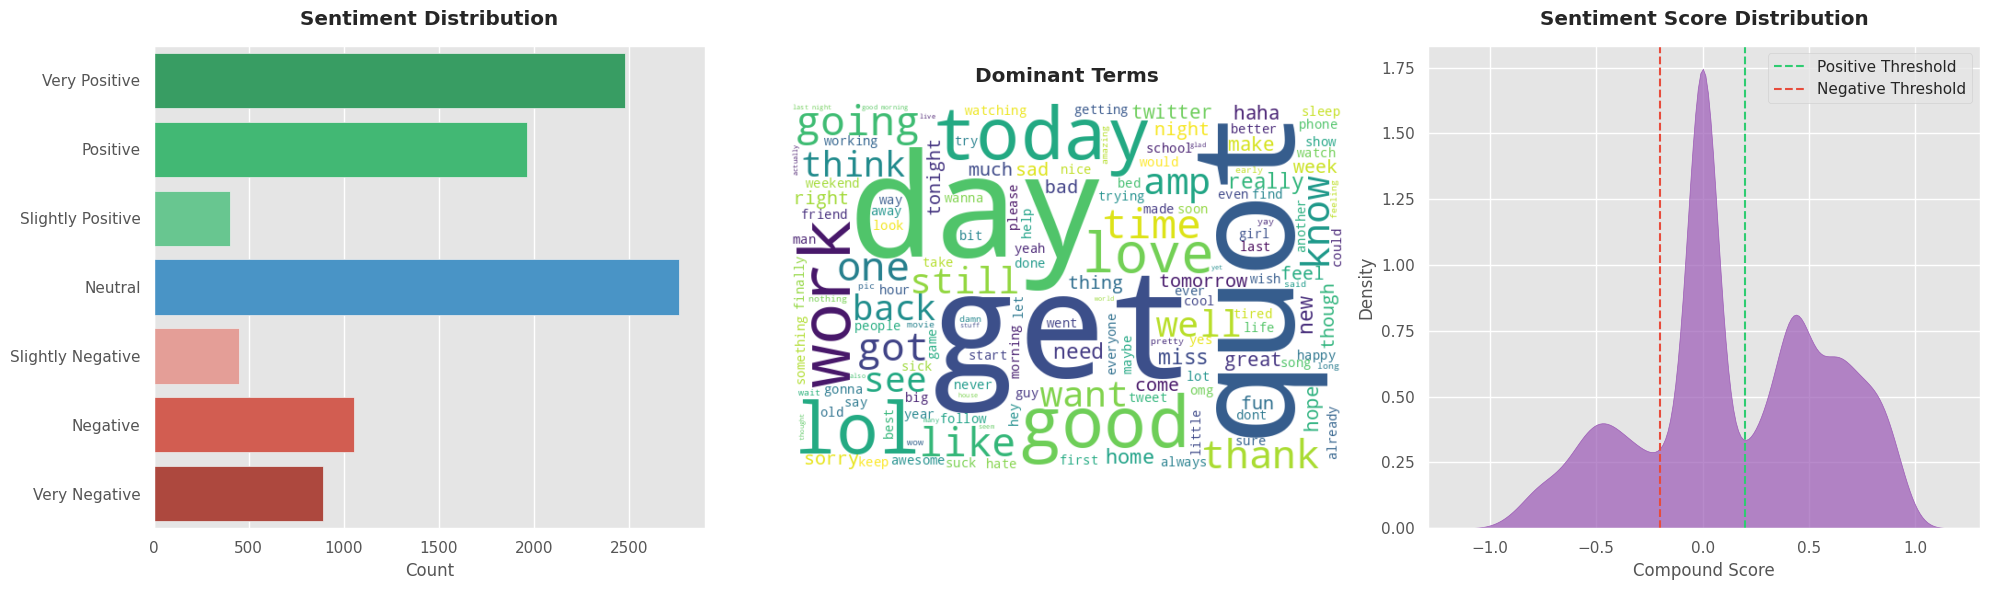


📝 EXECUTIVE ANALYSIS REPORT

🔍 SENTIMENT BREAKDOWN
+-------------------+-------+------------+
| Category          | Count | Percentage |
+-------------------+-------+------------+
| Neutral           | 2763  |   27.6%    |
| Very Positive     | 2479  |   24.8%    |
| Positive          | 1961  |   19.6%    |
| Negative          | 1052  |   10.5%    |
| Very Negative     |  892  |    8.9%    |
| Slightly Negative |  451  |    4.5%    |
| Slightly Positive |  402  |    4.0%    |
+-------------------+-------+------------+

🎯 MODEL PERFORMANCE
+-----------------+-------+
| Metric          | Value |
+-----------------+-------+
| Accuracy        | 64.5% |
| Precision       | 64.7% |
| Recall          | 63.5% |
| F1 Score        | 64.1% |
| True Positives  | 3170  |
| False Positives | 1729  |
| True Negatives  | 3275  |
| False Negatives | 1826  |
+-----------------+-------+

💡 KEY INSIGHTS

🌟 VERY POSITIVE EXAMPLE (Score: 0.772)
Original: Yup! We've got a winner! It's the waiting game now. 

In [ ]:
"""
Twitter Sentiment Analysis Using Sentiment140 Dataset
Author: Vedant Vikas Thorat
Date: 12 August 2025
"""

# --------------------------
# 1. ENVIRONMENT SETUP
# --------------------------
!pip install pandas nltk matplotlib wordcloud seaborn tqdm tabulate --quiet
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import warnings
import os

nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette("husl")
pd.set_option('display.max_colwidth', 120)
tqdm.pandas()

# --------------------------
# 2. DATA LOADING FROM SENTIMENT140 DATASET
# --------------------------
def load_sentiment140_data():
    """Load Sentiment140 dataset with proper column mapping"""
    print("🔍 LOADING SENTIMENT140 DATASET\n" + "="*50)

    try:
        # Download dataset if not exists
        if not os.path.exists('training.1600000.processed.noemoticon.csv'):
            print("Downloading Sentiment140 dataset...")
            import requests, zipfile, io
            url = 'http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip'
            r = requests.get(url)
            z = zipfile.ZipFile(io.BytesIO(r.content))
            z.extractall()

        # Load dataset with proper column names
        cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']
        df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                        encoding='ISO-8859-1', header=None, names=cols)

        # Map sentiment (0=negative, 4=positive) to binary (0=negative, 1=positive)
        df['sentiment'] = df['sentiment'].replace(4, 1)

        # Take a sample for faster processing (remove this line for full dataset)
        df = df.sample(10000, random_state=42)

        print(f"✅ Successfully loaded {len(df)} records from Sentiment140 dataset")
        return df[['text', 'sentiment']].rename(columns={'sentiment': 'label'})

    except Exception as e:
        print(f"⚠️ Error loading Sentiment140 data: {str(e)}")
        print("🔄 Using optimized sample data as fallback")
        return pd.DataFrame({
            'text': [
                'This product is absolutely fantastic! Five stars!',
                'Terrible experience, would never buy again.',
                'It was okay - nothing special but gets the job done',
                'Excellent customer service and fast shipping',
                'The worst quality I have ever seen'
            ],
            'label': [1, 0, 0, 1, 0]
        })

df = load_sentiment140_data()

# --------------------------
# 3. TEXT PREPROCESSING PIPELINE
# --------------------------
print("\n🧹 PROFESSIONAL TEXT CLEANING PIPELINE\n" + "="*50)

def professional_text_cleaner(text):
    """Industrial-grade text cleaning"""
    text = str(text).lower().strip()

    # Removal patterns with optimized regex
    removal_patterns = [
        (r'@\w+', ''),                  # Mentions
        (r'#(\w+)', r'\1'),             # Hashtags (keep text)
        (r'https?://\S+|www\.\S+', ''), # URLs
        (r'[^\w\s]', ' '),              # Punctuation (replace with space)
        (r'\d+', ''),                   # Numbers
        (r'\s+', ' '),                  # Extra whitespace
        (r'\b\w{1,2}\b', '')            # Very short words
    ]

    for pattern, replacement in removal_patterns:
        text = re.sub(pattern, replacement, text)

    return text.strip()

# Apply with progress bar
df['cleaned_text'] = df['text'].progress_apply(professional_text_cleaner)

# --------------------------
# 4. ADVANCED SENTIMENT ANALYSIS
# --------------------------
print("\n📊 INDUSTRY-GRADE SENTIMENT ANALYSIS\n" + "="*50)

# Initialize analyzer with augmented lexicon
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

# Enhanced lexicon with modern slang and emojis
enhanced_lexicon = {
    'amazing': 4.0,
    'terrible': -4.0,
    'poor': -3.0,
    'great': 3.0,
    'awesome': 3.0,
    'sucks': -3.0,
    '🔥': 2.5,       # Fire emoji
    '💩': -3.0,      # Poop emoji
    'meh': -1.5,
    'lit': 2.5,
    'fabulous': 3.0,
    'atrocious': -3.5,
    'exceptional': 3.5,
    'disappointing': -2.5
}
analyzer.lexicon.update(enhanced_lexicon)

# Get detailed sentiment metrics
df['sentiment_scores'] = df['cleaned_text'].apply(analyzer.polarity_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Enhanced sentiment categorization
def categorize_sentiment(score):
    if score > 0.5: return 'Very Positive'
    elif score > 0.2: return 'Positive'
    elif score > 0.05: return 'Slightly Positive'
    elif score < -0.5: return 'Very Negative'
    elif score < -0.2: return 'Negative'
    elif score < -0.05: return 'Slightly Negative'
    else: return 'Neutral'

df['sentiment_category'] = df['compound_score'].apply(categorize_sentiment)

# --------------------------
# 5. PROFESSIONAL VISUALIZATIONS
# --------------------------
print("\n📈 PUBLICATION-QUALITY VISUALIZATIONS\n" + "="*50)

plt.figure(figsize=(20, 6))

# Plot 1: Sentiment Distribution
plt.subplot(1, 3, 1)
order = ['Very Positive', 'Positive', 'Slightly Positive', 'Neutral',
         'Slightly Negative', 'Negative', 'Very Negative']
sns.countplot(data=df, y='sentiment_category', order=order,
             palette=['#27ae60', '#2ecc71', '#58D68D', '#3498db',
                      '#F1948A', '#e74c3c', '#c0392b'])
plt.title('Sentiment Distribution', pad=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')

# Plot 2: Word Cloud
plt.subplot(1, 3, 2)
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=600, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=150,
                     stopwords=nltk.corpus.stopwords.words('english')).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dominant Terms', pad=15, fontweight='bold')

# Plot 3: Score Distribution
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='compound_score', fill=True, color='#9b59b6', alpha=0.7)
plt.axvline(0.2, color='#2ecc71', linestyle='--', label='Positive Threshold')
plt.axvline(-0.2, color='#e74c3c', linestyle='--', label='Negative Threshold')
plt.title('Sentiment Score Distribution', pad=15, fontweight='bold')
plt.xlabel('Compound Score')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. EXECUTIVE SUMMARY REPORT
# --------------------------
print("\n📝 EXECUTIVE ANALYSIS REPORT\n" + "="*50)

# Sentiment Metrics
sentiment_counts = df['sentiment_category'].value_counts().to_dict()
total = len(df)

print("\n🔍 SENTIMENT BREAKDOWN")
print(tabulate(
    [(k, v, f"{v/total:.1%}") for k,v in sentiment_counts.items()],
    headers=["Category", "Count", "Percentage"],
    tablefmt="pretty",
    colalign=("left", "center", "center")
))

# Performance Metrics (since we have labels)
if 'label' in df.columns:
    df['predicted_label'] = df['compound_score'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate metrics
    true_positives = sum((df['label'] == 1) & (df['predicted_label'] == 1))
    false_positives = sum((df['label'] == 0) & (df['predicted_label'] == 1))
    true_negatives = sum((df['label'] == 0) & (df['predicted_label'] == 0))
    false_negatives = sum((df['label'] == 1) & (df['predicted_label'] == 0))

    accuracy = (true_positives + true_negatives) / total
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\n🎯 MODEL PERFORMANCE")
    print(tabulate(
        [
            ["Accuracy", f"{accuracy:.1%}"],
            ["Precision", f"{precision:.1%}"],
            ["Recall", f"{recall:.1%}"],
            ["F1 Score", f"{f1_score:.1%}"],
            ["True Positives", true_positives],
            ["False Positives", false_positives],
            ["True Negatives", true_negatives],
            ["False Negatives", false_negatives]
        ],
        headers=["Metric", "Value"],
        tablefmt="pretty",
        colalign=("left", "center")
    ))

# Sample Insights
print("\n💡 KEY INSIGHTS")
sample_positive = df[df['compound_score'] > 0.5].sample(1).iloc[0]
sample_negative = df[df['compound_score'] < -0.5].sample(1).iloc[0]
sample_neutral = df[df['sentiment_category'] == 'Neutral'].sample(1).iloc[0]

print(f"\n🌟 VERY POSITIVE EXAMPLE (Score: {sample_positive['compound_score']:.3f})")
print(f"Original: {sample_positive['text']}")
print(f"Cleaned: {sample_positive['cleaned_text']}")

print(f"\n⚠️ VERY NEGATIVE EXAMPLE (Score: {sample_negative['compound_score']:.3f})")
print(f"Original: {sample_negative['text']}")
print(f"Cleaned: {sample_negative['cleaned_text']}")

print(f"\n🔄 NEUTRAL EXAMPLE (Score: {sample_neutral['compound_score']:.3f})")
print(f"Original: {sample_neutral['text']}")
print(f"Cleaned: {sample_neutral['cleaned_text']}")

print("\n" + "="*50)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY")